In [1]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"10F4zvBcevGmsMhl_AE1ETktgW-woalQ1"})   # replace the id with id of file you want to access
downloaded.GetContentFile('AQI-AT.xlsx')        # replace the file name with your file
 

In [2]:
pip install keras-tuner

     |████████████████████████████████| 102kB 4.8MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=7c9252e439776ebf2b18a447745b83c9fd22629110d97aed5d8217918cef57b6
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [2]:
from keras.models import Sequential
from tensorflow import keras
import kerastuner as kt
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN,GRU
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: ignored

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
#import the data file
dfs = pd.read_excel("AQI-AT.xlsx")
dfs

,From Date,To Date,AT (degree C),PM10 (ug/m3),PM2.5 (ug/m3),NO2 (ug/m3),NO (ug/m3),NOx (ug/m3),SO2 (ug/m3),CO (mg/m3)
0,05-May-2020 - 00:00,05-May-2020 - 01:00,27.55,98.75,55.00,17.12,2.05,10.78,15.30,0.65
1,05-May-2020 - 01:00,05-May-2020 - 02:00,25.80,92.00,54.50,23.23,2.80,14.65,15.15,0.80
2,05-May-2020 - 02:00,05-May-2020 - 03:00,24.80,108.75,61.25,31.70,3.90,20.10,11.90,0.90
3,05-May-2020 - 03:00,05-May-2020 - 04:00,24.25,109.25,60.00,37.00,7.70,25.92,12.55,0.85
4,05-May-2020 - 04:00,05-May-2020 - 05:00,24.12,133.25,64.00,34.30,10.15,26.50,12.93,0.83
...,...,...,...,...,...,...,...,...,...,...
9538,06-Jun-2021 - 10:00,06-Jun-2021 - 11:00,33.58,166.50,31.50,12.90,7.15,20.85,1.93,0.30
9539,06-Jun-2021 - 11:00,06-Jun-2021 - 12:00,34.75,242.00,39.75,11.68,5.53,17.02,1.40,0.32
9540,06-Jun-2021 - 12:00,06-Jun-2021 - 13:00,36.10,271.50,48.00,12.47,3.60,16.07,1.55,0.35
9541,06-Jun-2021 - 13:00,06-Jun-2021 - 14:00,37.77,223.75,37.75,11.97,4.40,16.15,2.20,0.32


In [5]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp_mean.fit(dfs.iloc[:,2:10])
dfs.iloc[:,2:10] = imputer.transform(dfs.iloc[:,2:10])

In [6]:
dfs['CO (mg/m3)'].isnull().sum()

0

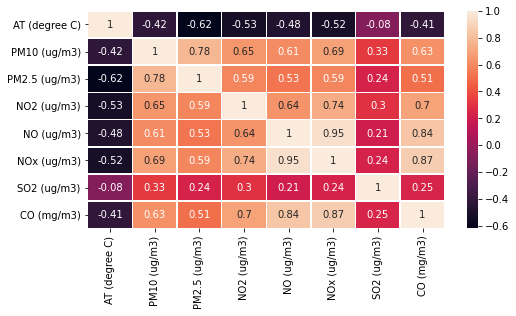

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
ax=plt.subplot(111)
correlation_matrix = dfs.corr().round(2)
sns.heatmap(data=correlation_matrix,ax=ax,linewidths=0.5,annot=True)

In [9]:
L = len(dfs['CO (mg/m3)'])
input_data = np.concatenate((np.array(dfs['CO (mg/m3)']).reshape(L,1), np.array(dfs['NO (ug/m3)']).reshape(L,1), 
                           np.array(dfs['NO2 (ug/m3)']).reshape(L,1), np.array(dfs['NOx (ug/m3)']).reshape(L,1), np.array(dfs['PM10 (ug/m3)']).reshape(L,1),
                           np.array(dfs['PM2.5 (ug/m3)']).reshape(L,1)), axis = 1)

In [10]:
output_data = np.array(dfs['AT (degree C)'])

In [11]:
output_data[1:10]

array([25.8 , 24.8 , 24.25, 24.12, 24.82, 26.57, 29.77, 29.82, 32.1 ])

In [12]:
input_data.shape

(9543, 6)

In [17]:
# given 50 input data of temperature and aqi find the next 10 temperature data
Temp_target = []
Temp_prior= []

for i in range(0,9543-120):
  Temp_inp = np.array(input_data[i:i+100,:])
  Temp_out = np.array(output_data[i:i+100])

  Max_inp_Temp = Temp_inp.max(0)
  Min_inp_Temp = Temp_inp.min(0)

  Max_out_Temp = Temp_out.max(0)
  Min_out_Temp = Temp_out.min(0)

  Temp_prior.append((input_data[i:i+100,:] - Min_inp_Temp)/Max_inp_Temp); 
  Temp_target.append((output_data[i+100:i+120] - Min_out_Temp)/Max_out_Temp); 

Temp_prior = np.array(Temp_prior)
Temp_target = np.array(Temp_target)



In [18]:
Temp_prior.shape


(9423, 100, 6)

In [19]:
Temp_target.shape

(9423, 20)

In [1]:
x_train, x_test, y_train, y_test = train_test_split(Temp_prior, Temp_target, test_size = 0.2, random_state = 4);

NameError: ignored

In [3]:
from sklearn.model_selection import train_test_split

In [13]:
r=[1,2,3,4,5,6,7,8,9,10,11,12]
s=['a','b','c','d','e','f','g','h','i','j','k','l']
trx,xt,ytr,yt = train_test_split(r,s, test_size = 0.2,random_state= 4,shuffle=False)


In [14]:
ytr

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [15]:
trx

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
x_train.shape

(7538, 100, 6)

In [22]:
y_train.shape

(7538, 20)

#without Keras tuner

In [ ]:
# model 1 Simple RNN 128, 16, 10
model1 = Sequential()
model1.add(SimpleRNN((128), batch_input_shape = (None, 50,6), return_sequences = True))
model1.add(SimpleRNN((16), return_sequences = False))
model1.add(Dense(10, activation='relu'))
model1.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 50, 128)           17280     
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 16)                2320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 19,770
Trainable params: 19,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 10s 236ms/step - loss: 0.0870 - accuracy: 0.1337 - val_loss: 0.0543 - val_accuracy: 0.2244
Epoch 2/100
14/14 [==============================] - 2s 150ms/step - loss: 0.0526 - accuracy: 0.2495 - val_loss: 0.0478 - val_accuracy: 0.3022
Epoch 3/100
14/14 [==============================] - 2s 150ms/step - loss: 0.0477 - accuracy: 0.3048 - val_loss: 0.0451 - val_accuracy: 0.2078
Epoch 4/100
14/14 [==============================] - 2s 148ms/step - loss: 0.0460 - accuracy: 0.2564 - val_loss: 0.0437 - val_accuracy: 0.3154
Epoch 5/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0442 - accuracy: 0.3248 - val_loss: 0.0430 - val_accuracy: 0.3246
Epoch 6/100
14/14 [==============================] - 2s 147ms/step - loss: 0.0440 - accuracy: 0.3751 - val_loss: 0.0425 - val_accuracy: 0.4373
Epoch 7/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0423 - accuracy: 0.4267 - val_loss: 0.0421 - val_accuracy: 0.429

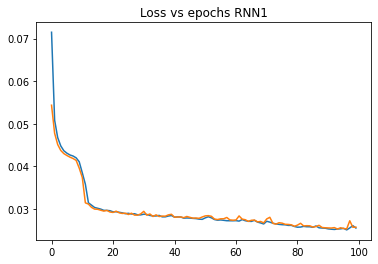

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss vs epochs RNN1')
plt.show()

In [ ]:
# model 2 Simple RNN 300, 50 10
model2 = Sequential()
model2.add(SimpleRNN((300), batch_input_shape = (None, 50,6), return_sequences = True))
model2.add(SimpleRNN((50), return_sequences = False))
model2.add(Dense(10, activation='relu'))
model2.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 50, 300)           92100     
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 50)                17550     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 110,160
Trainable params: 110,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 10s 551ms/step - loss: 0.1027 - accuracy: 0.0828 - val_loss: 0.0520 - val_accuracy: 0.1975
Epoch 2/100
14/14 [==============================] - 7s 491ms/step - loss: 0.0509 - accuracy: 0.2099 - val_loss: 0.0456 - val_accuracy: 0.2335
Epoch 3/100
14/14 [==============================] - 7s 490ms/step - loss: 0.0457 - accuracy: 0.2709 - val_loss: 0.0433 - val_accuracy: 0.2816
Epoch 4/100
14/14 [==============================] - 7s 496ms/step - loss: 0.0428 - accuracy: 0.2917 - val_loss: 0.0431 - val_accuracy: 0.2582
Epoch 5/100
14/14 [==============================] - 7s 489ms/step - loss: 0.0431 - accuracy: 0.2927 - val_loss: 0.0426 - val_accuracy: 0.3211
Epoch 6/100
14/14 [==============================] - 7s 491ms/step - loss: 0.0421 - accuracy: 0.3220 - val_loss: 0.0421 - val_accuracy: 0.3297
Epoch 7/100
14/14 [==============================] - 7s 491ms/step - loss: 0.0420 - accuracy: 0.3336 - val_loss: 0.0420 - val_accuracy: 0.391

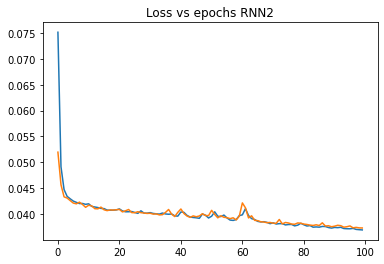

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs epochs RNN2')
plt.show()

In [ ]:
# model 3 Simple RNN 200, 25 10
model3 = Sequential()
model3.add(SimpleRNN((200), batch_input_shape = (None, 50,6), return_sequences = True))
model3.add(SimpleRNN((25), return_sequences = False))
model3.add(Dense(10, activation='relu'))
model3.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 50, 200)           41400     
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 25)                5650      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
Total params: 47,310
Trainable params: 47,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 7s 327ms/step - loss: 0.0896 - accuracy: 0.0877 - val_loss: 0.0524 - val_accuracy: 0.0796
Epoch 2/100
14/14 [==============================] - 4s 267ms/step - loss: 0.0472 - accuracy: 0.1882 - val_loss: 0.0423 - val_accuracy: 0.2187
Epoch 3/100
14/14 [==============================] - 4s 277ms/step - loss: 0.0414 - accuracy: 0.2414 - val_loss: 0.0395 - val_accuracy: 0.4070
Epoch 4/100
14/14 [==============================] - 4s 275ms/step - loss: 0.0399 - accuracy: 0.3877 - val_loss: 0.0381 - val_accuracy: 0.4041
Epoch 5/100
14/14 [==============================] - 4s 273ms/step - loss: 0.0374 - accuracy: 0.4240 - val_loss: 0.0373 - val_accuracy: 0.3973
Epoch 6/100
14/14 [==============================] - 4s 274ms/step - loss: 0.0367 - accuracy: 0.4435 - val_loss: 0.0370 - val_accuracy: 0.4900
Epoch 7/100
14/14 [==============================] - 4s 275ms/step - loss: 0.0364 - accuracy: 0.4676 - val_loss: 0.0365 - val_accuracy: 0.4825

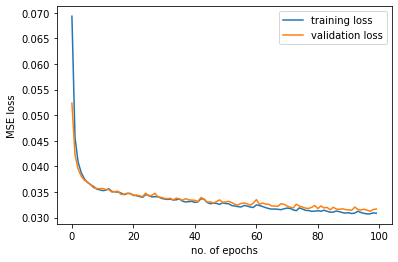

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel("no. of epochs")
plt.ylabel("MSE loss")
plt.legend(['training loss','validation loss'])
plt.show()

In [ ]:
# model 4 LSTM 128, 16, 10
model4 = Sequential()
model4.add(LSTM((128), batch_input_shape = (None, 50,6), return_sequences = True))
model4.add(LSTM((16), return_sequences = False))
model4.add(Dense(10, activation='relu'))
model4.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 128)           69120     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                9280      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 78,570
Trainable params: 78,570
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = model4.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 9s 536ms/step - loss: 0.0385 - accuracy: 0.1367 - val_loss: 0.0324 - val_accuracy: 0.1351
Epoch 2/100
14/14 [==============================] - 6s 460ms/step - loss: 0.0310 - accuracy: 0.0690 - val_loss: 0.0296 - val_accuracy: 0.0962
Epoch 3/100
14/14 [==============================] - 6s 459ms/step - loss: 0.0283 - accuracy: 0.1446 - val_loss: 0.0259 - val_accuracy: 0.1133
Epoch 4/100
14/14 [==============================] - 6s 459ms/step - loss: 0.0234 - accuracy: 0.2132 - val_loss: 0.0201 - val_accuracy: 0.4110
Epoch 5/100
14/14 [==============================] - 6s 460ms/step - loss: 0.0173 - accuracy: 0.4639 - val_loss: 0.0149 - val_accuracy: 0.5283
Epoch 6/100
14/14 [==============================] - 6s 462ms/step - loss: 0.0145 - accuracy: 0.5412 - val_loss: 0.0137 - val_accuracy: 0.5552
Epoch 7/100
14/14 [==============================] - 6s 460ms/step - loss: 0.0135 - accuracy: 0.5417 - val_loss: 0.0131 - val_accuracy: 0.5449

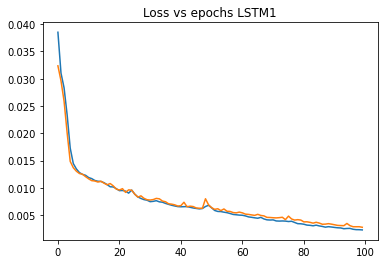

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss vs epochs LSTM1')
plt.show()

In [ ]:
# model 5 LSTM 300, 50, 6
model5 = Sequential()
model5.add(LSTM((256), batch_input_shape = (None, 50,6), return_sequences = True))
model5.add(LSTM((64), return_sequences = False))
model5.add(Dense(10, activation='relu'))
model5.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 256)           269312    
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 352,138
Trainable params: 352,138
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history5 = model5.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 25s 2s/step - loss: 0.0413 - accuracy: 0.1722 - val_loss: 0.0264 - val_accuracy: 0.3366
Epoch 2/100
14/14 [==============================] - 20s 1s/step - loss: 0.0251 - accuracy: 0.3701 - val_loss: 0.0188 - val_accuracy: 0.5112
Epoch 3/100
14/14 [==============================] - 20s 1s/step - loss: 0.0183 - accuracy: 0.4557 - val_loss: 0.0159 - val_accuracy: 0.4883
Epoch 4/100
14/14 [==============================] - 20s 1s/step - loss: 0.0152 - accuracy: 0.4915 - val_loss: 0.0148 - val_accuracy: 0.5507
Epoch 5/100
14/14 [==============================] - 20s 1s/step - loss: 0.0144 - accuracy: 0.5277 - val_loss: 0.0137 - val_accuracy: 0.5467
Epoch 6/100
14/14 [==============================] - 20s 1s/step - loss: 0.0135 - accuracy: 0.5221 - val_loss: 0.0130 - val_accuracy: 0.5718
Epoch 7/100
14/14 [==============================] - 20s 1s/step - loss: 0.0132 - accuracy: 0.5632 - val_loss: 0.0126 - val_accuracy: 0.5409
Epoch 8/100
1

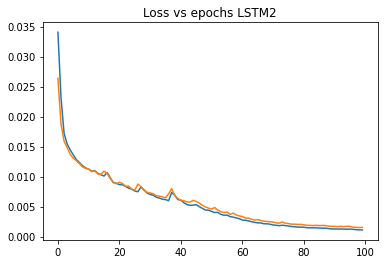

In [ ]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss vs epochs LSTM2')
plt.show()

In [ ]:
# model 6 LSTM 200, 25, 6
model6 = Sequential()
model6.add(LSTM((64), batch_input_shape = (None, 50,6), return_sequences = True))
model6.add(LSTM((16), return_sequences = False))
model6.add(Dense(10, activation='relu'))
model6.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model6.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 64)            18176     
_________________________________________________________________
lstm_9 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
Total params: 23,530
Trainable params: 23,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history6 = model6.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 7s 304ms/step - loss: 0.0597 - accuracy: 0.0399 - val_loss: 0.0456 - val_accuracy: 0.0475
Epoch 2/100
14/14 [==============================] - 3s 234ms/step - loss: 0.0427 - accuracy: 0.1104 - val_loss: 0.0400 - val_accuracy: 0.1889
Epoch 3/100
14/14 [==============================] - 3s 233ms/step - loss: 0.0397 - accuracy: 0.1307 - val_loss: 0.0386 - val_accuracy: 0.0750
Epoch 4/100
14/14 [==============================] - 3s 236ms/step - loss: 0.0382 - accuracy: 0.1181 - val_loss: 0.0370 - val_accuracy: 0.2862
Epoch 5/100
14/14 [==============================] - 3s 231ms/step - loss: 0.0357 - accuracy: 0.2833 - val_loss: 0.0346 - val_accuracy: 0.3440
Epoch 6/100
14/14 [==============================] - 3s 234ms/step - loss: 0.0336 - accuracy: 0.4081 - val_loss: 0.0296 - val_accuracy: 0.5106
Epoch 7/100
14/14 [==============================] - 3s 232ms/step - loss: 0.0288 - accuracy: 0.4149 - val_loss: 0.0257 - val_accuracy: 0.1992

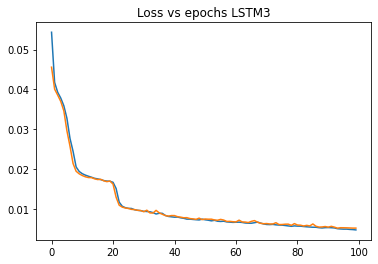

In [ ]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Loss vs epochs LSTM3')
plt.show()

In [ ]:
# model 7 GRU 128 16, 6
model7 = Sequential()
model7.add(GRU((128), batch_input_shape = (None, 50,6), return_sequences = True))
model7.add(GRU((16), return_sequences = False))
model7.add(Dense(10, activation='relu'))
model7.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model7.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50, 128)           52224     
_________________________________________________________________
gru_1 (GRU)                  (None, 16)                7008      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 59,402
Trainable params: 59,402
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history7 = model7.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 11s 460ms/step - loss: 0.0497 - accuracy: 0.1740 - val_loss: 0.0385 - val_accuracy: 0.0498
Epoch 2/100
14/14 [==============================] - 6s 398ms/step - loss: 0.0373 - accuracy: 0.1810 - val_loss: 0.0348 - val_accuracy: 0.3011
Epoch 3/100
14/14 [==============================] - 6s 395ms/step - loss: 0.0343 - accuracy: 0.1745 - val_loss: 0.0328 - val_accuracy: 0.3446
Epoch 4/100
14/14 [==============================] - 6s 397ms/step - loss: 0.0319 - accuracy: 0.3319 - val_loss: 0.0303 - val_accuracy: 0.3841
Epoch 5/100
14/14 [==============================] - 5s 391ms/step - loss: 0.0303 - accuracy: 0.3901 - val_loss: 0.0278 - val_accuracy: 0.4396
Epoch 6/100
14/14 [==============================] - 5s 394ms/step - loss: 0.0266 - accuracy: 0.4619 - val_loss: 0.0252 - val_accuracy: 0.4585
Epoch 7/100
14/14 [==============================] - 5s 394ms/step - loss: 0.0242 - accuracy: 0.4420 - val_loss: 0.0173 - val_accuracy: 0.258

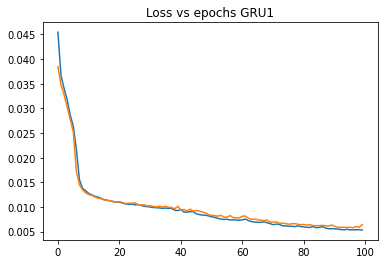

In [ ]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Loss vs epochs GRU1')
plt.show()

In [ ]:
# model 8
model8 = Sequential()
model8.add(GRU((256), batch_input_shape = (None, 50,6), return_sequences = True))
model8.add(GRU((64), return_sequences = False))
model8.add(Dense(10, activation='relu'))
model8.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model8.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 50, 256)           202752    
_________________________________________________________________
gru_5 (GRU)                  (None, 64)                61824     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 265,226
Trainable params: 265,226
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history8 = model8.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 21s 1s/step - loss: 0.0505 - accuracy: 0.1398 - val_loss: 0.0357 - val_accuracy: 0.2725
Epoch 2/100
14/14 [==============================] - 16s 1s/step - loss: 0.0339 - accuracy: 0.2395 - val_loss: 0.0279 - val_accuracy: 0.2387
Epoch 3/100
14/14 [==============================] - 16s 1s/step - loss: 0.0263 - accuracy: 0.3633 - val_loss: 0.0234 - val_accuracy: 0.4442
Epoch 4/100
14/14 [==============================] - 16s 1s/step - loss: 0.0215 - accuracy: 0.4373 - val_loss: 0.0164 - val_accuracy: 0.2364
Epoch 5/100
14/14 [==============================] - 16s 1s/step - loss: 0.0160 - accuracy: 0.3756 - val_loss: 0.0151 - val_accuracy: 0.5117
Epoch 6/100
14/14 [==============================] - 16s 1s/step - loss: 0.0142 - accuracy: 0.4757 - val_loss: 0.0140 - val_accuracy: 0.5238
Epoch 7/100
14/14 [==============================] - 16s 1s/step - loss: 0.0144 - accuracy: 0.5509 - val_loss: 0.0137 - val_accuracy: 0.5392
Epoch 8/100
1

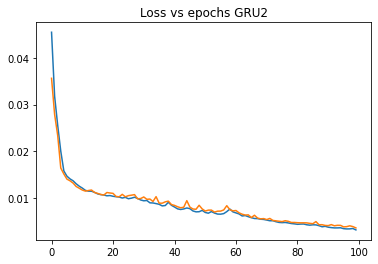

In [ ]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Loss vs epochs GRU2')
plt.show()

In [ ]:
# model 9 LSTM 200, 25, 6
model9 = Sequential()
model9.add(GRU((64), batch_input_shape = (None, 50,6), return_sequences = True))
model9.add(GRU((16), return_sequences = False))
model9.add(Dense(10, activation='relu'))
model9.compile(loss = 'mse',  optimizer = 'adam', metrics = ['accuracy'])
model9.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 50, 64)            13824     
_________________________________________________________________
gru_7 (GRU)                  (None, 16)                3936      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170       
Total params: 17,930
Trainable params: 17,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history9 = model9.fit(x_train, y_train, batch_size =500, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
14/14 [==============================] - 7s 268ms/step - loss: 0.0514 - accuracy: 0.2006 - val_loss: 0.0385 - val_accuracy: 0.0893
Epoch 2/100
14/14 [==============================] - 3s 204ms/step - loss: 0.0378 - accuracy: 0.0732 - val_loss: 0.0327 - val_accuracy: 0.0864
Epoch 3/100
14/14 [==============================] - 3s 203ms/step - loss: 0.0317 - accuracy: 0.1218 - val_loss: 0.0302 - val_accuracy: 0.2891
Epoch 4/100
14/14 [==============================] - 3s 203ms/step - loss: 0.0296 - accuracy: 0.3165 - val_loss: 0.0290 - val_accuracy: 0.3125
Epoch 5/100
14/14 [==============================] - 3s 204ms/step - loss: 0.0285 - accuracy: 0.2589 - val_loss: 0.0278 - val_accuracy: 0.3011
Epoch 6/100
14/14 [==============================] - 3s 200ms/step - loss: 0.0277 - accuracy: 0.3078 - val_loss: 0.0262 - val_accuracy: 0.4150
Epoch 7/100
14/14 [==============================] - 3s 202ms/step - loss: 0.0252 - accuracy: 0.4030 - val_loss: 0.0219 - val_accuracy: 0.4104

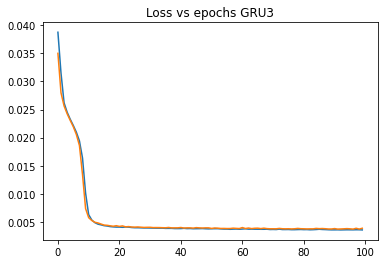

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs GRU3')
plt.show()

1


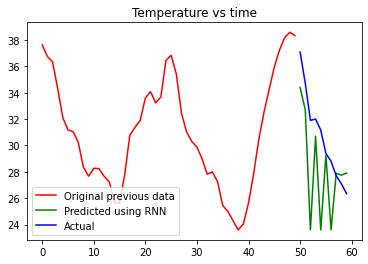

In [ ]:
# Visulising the results from model 1
data_Start_Point = 15;
test_Data = input_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = output_data[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Min = Temperature_input.min(0);
Max = Temperature_input.max(0)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = output_data[data_Start_Point+50:data_Start_Point+60];
results = model1.predict(((test_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
print(len(results))
results = results*Max+Min;
#time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using RNN','Actual'))

1


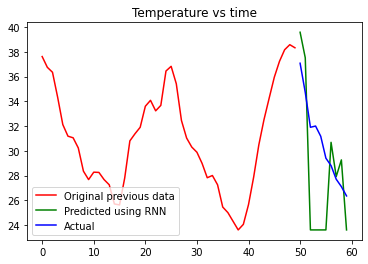

In [ ]:
# Visulising the results from model 2
data_Start_Point = 15;
test_Data = input_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = output_data[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Min = Temperature_input.min(0);
Max = Temperature_input.max(0)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = output_data[data_Start_Point+50:data_Start_Point+60];
results = model2.predict(((test_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
print(len(results))
results = results*Max+Min;
#time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using RNN','Actual'))

1


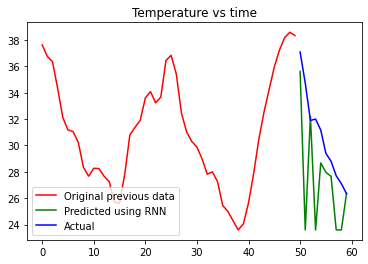

In [ ]:
# Visulising the results from model 3
data_Start_Point = 15;
test_Data = input_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = output_data[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Min = Temperature_input.min(0);
Max = Temperature_input.max(0)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = output_data[data_Start_Point+50:data_Start_Point+60];
results = model3.predict(((test_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
print(len(results))
results = results*Max+Min;
#time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using RNN','Actual'))

1


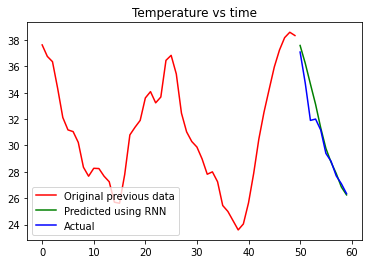

In [ ]:
# Visulising the results from model 4
data_Start_Point = 15;
test_Data = input_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = output_data[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Min = Temperature_input.min(0);
Max = Temperature_input.max(0)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = output_data[data_Start_Point+50:data_Start_Point+60];
results = model4.predict(((test_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
print(len(results))
results = results*Max+Min;
#time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using RNN','Actual'))

1


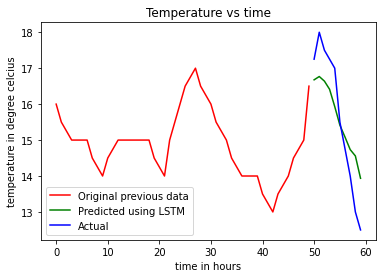

In [ ]:
# Visulising the results from model 5
data_Start_Point = 15;
test_Data = all_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = temp[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = temp[data_Start_Point+50:data_Start_Point+60];
results = model5.predict(((test_Data.reshape(50,2)-Mi)/Mx).reshape(1,50,2))
print(len(results))
results = results*Mx[0] +Mi[0];
time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.xlabel("time in hours")
plt.ylabel("temperature in degree celcius")
plt.legend(('Original previous data','Predicted using LSTM','Actual'))

1


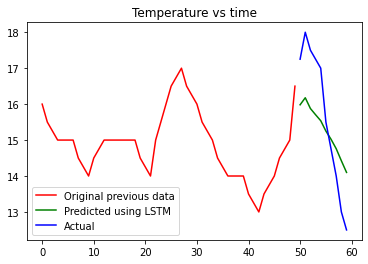

In [ ]:
# Visulising the results from model 6
data_Start_Point = 15;
test_Data = all_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = temp[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = temp[data_Start_Point+50:data_Start_Point+60];
results = model6.predict(((test_Data.reshape(50,2)-Mi)/Mx).reshape(1,50,2))
print(len(results))
results = results*Mx[0] +Mi[0];
time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using LSTM','Actual'))

1


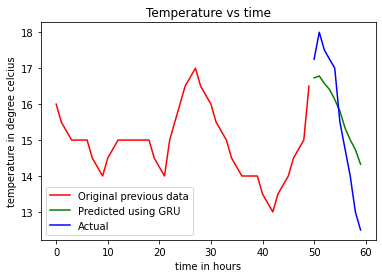

In [ ]:
# Visulising the results from model 7
data_Start_Point = 15;
test_Data = all_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = temp[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = temp[data_Start_Point+50:data_Start_Point+60];
results = model7.predict(((test_Data.reshape(50,2)-Mi)/Mx).reshape(1,50,2))
print(len(results))
results = results*Mx[0] +Mi[0];
time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.xlabel("time in hours")
plt.ylabel("temperature in degree celcius")
plt.legend(('Original previous data','Predicted using GRU','Actual'))

1


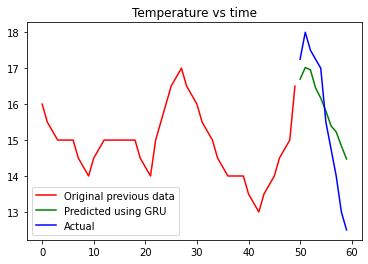

In [ ]:
# Visulising the results from model 8
data_Start_Point = 15;
test_Data = all_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = temp[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = temp[data_Start_Point+50:data_Start_Point+60];
results = model8.predict(((test_Data.reshape(50,2)-Mi)/Mx).reshape(1,50,2))
print(len(results))
results = results*Mx[0] +Mi[0];
time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using GRU','Actual'))

1


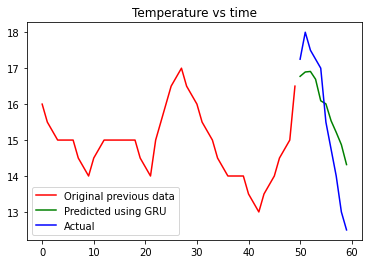

In [ ]:
# Visulising the results from model 9
data_Start_Point = 15;
test_Data = all_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = temp[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = temp[data_Start_Point+50:data_Start_Point+60];
results = model9.predict(((test_Data.reshape(50,2)-Mi)/Mx).reshape(1,50,2))
print(len(results))
results = results*Mx[0] +Mi[0];
time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using GRU','Actual'))

In [ ]:
time = dfs['Datetime'][15]
time

Timestamp('2015-01-02 07:00:00')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
ax=plt.subplot(111)
correlation_matrix = dfs.corr().round(2)
sns.heatmap(data=correlation_matrix,ax=ax,linewidths=0.5,annot=True)


In [ ]:
#visualisation 
import plotly.express as px
fig = px.line(dfs, x="Datetime", y="PM2.5")
fig.show()

In [ ]:
fig = px.line(dfs, x="Datetime", y="PM10")
fig.show()

In [ ]:
fig = px.line(dfs, x="Datetime", y="AQI")
fig.show()


In [ ]:
temp.shape

(8792,)

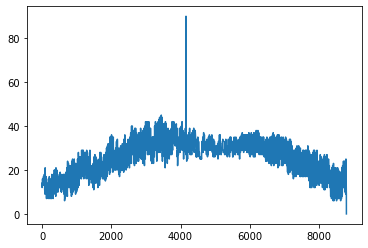

In [ ]:
plt.plot(temp)

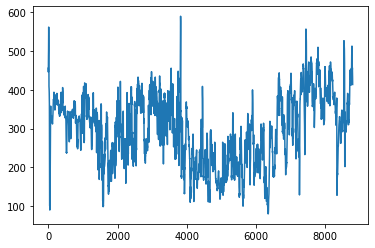

In [ ]:
plt.plot(training_x_data[:8791])

#with Keras tuner


In [26]:
def model_builder(hp):
  model = keras.Sequential()
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  for i in range(hp.Int('num_layers', 2, 3)): 
      model.add(keras.layers.SimpleRNN(units=hp.Int('units_' + str(i),min_value=32,max_value=448,step=32), 
                                       activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid','softmax'], 
                                                            default='relu'), batch_input_shape = (None, 100,6),return_sequences = True))
  model.add(SimpleRNN((16), return_sequences = False))
  model.add(keras.layers.Dense(20))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mse',metrics = ['mae'])
 
  return model

In [27]:
tuner1 = kt.Hyperband(model_builder,
                     objective='mae',
                     max_epochs=10,
                     factor=4,
                     directory='VIR',
                     project_name='int_rnn_kt')

In [28]:
tuner1.search(x_train, y_train, epochs=50, validation_data=(x_test,y_test))

Trial 11 Complete [00h 17m 25s]
mae: 0.08635880053043365

Best mae So Far: 0.07866588234901428
Total elapsed time: 01h 37m 05s
INFO:tensorflow:Oracle triggered exit


In [29]:
tuner1.results_summary(1)  # print out the summary of the best model

Results summary
Results in VIR/int_rnn_kt
Showing 1 best trials
Objective(name='mae', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 96
dense_activation: tanh
units_1: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 3
tuner/bracket: 1
tuner/round: 1
units_2: 32
tuner/trial_id: a03bb76015a1d96da7d28697d226f831
Score: 0.07866588234901428


In [30]:
best_hps=tuner1.get_best_hyperparameters(num_trials=1)[0]

In [31]:
model10 = tuner1.hypermodel.build(best_hps)
model10.summary()
history10 = model10.fit(x_train, y_train, epochs=50, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 96)           9888      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100, 64)           10304     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100, 32)           3104      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 20)                340       
Total params: 24,420
Trainable params: 24,420
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
189/189 [==============================] - 83s 424ms/step - loss: 0.0467 - mae: 0.1565 - val_loss: 0.0292 -

In [61]:
def mape(ytrue,ypred):
  m = np.mean(np.abs((ytrue - ypred)/ytrue))*100
  return m

In [55]:
input_data.shape

(9543, 6)

In [53]:
x_train[0].shape

(50, 6)

In [59]:
x_train[0].min()

0.0

In [71]:
MAPE_train = []
#for training section
for i in range(0,100):
  #data_Start_Point = i
  #training_MAPE_Data = x_train[data_Start_Point:data_Start_Point+50,:];
  #Temperature_input = y_train[data_Start_Point:data_Start_Point+50]
  #A = np.array(training_MAPE_Data)
  #Min = Temperature_input.min(0);
  #Max = Temperature_input.max(0)
  #Mi = A.min(0);
  #Mx = A.max(0);
  
  #actual_Target = y_train[data_Start_Point+50:data_Start_Point+60];
  #results = model10.predict(((training_MAPE_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
  actual_Target = y_train[i];
  results = model10.predict((x_train[i]).reshape(1,50,6))
  MAPE_train.append(mape(actual_Target,results))
print(MAPE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


[26.29488055  6.22610324  7.77496054  8.21949975  6.42273778  6.40032746
  1.58021906 27.93950425 19.75514824  8.82293223]


In [62]:
# MAPE calculation
MAPE_train = []
#for training section
for i in range(0,len(x_train)):
  #data_Start_Point = i
  #training_MAPE_Data = x_train[data_Start_Point:data_Start_Point+50,:];
  #Temperature_input = y_train[data_Start_Point:data_Start_Point+50]
  #A = np.array(training_MAPE_Data)
  #Min = Temperature_input.min(0);
  #Max = Temperature_input.max(0)
  #Mi = A.min(0);
  #Mx = A.max(0);
  
  #actual_Target = y_train[data_Start_Point+50:data_Start_Point+60];
  #results = model10.predict(((training_MAPE_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
  actual_Target = y_train[i];
  results = model10.predict((x_train[i]).reshape(1,50,6))
  MAPE_train.append(mape(actual_Target,results))
print(MAPE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


KeyboardInterrupt: ignored

In [72]:
MAPE=np.array(MAPE_train)

In [73]:
np.mean(MAPE)

inf

1


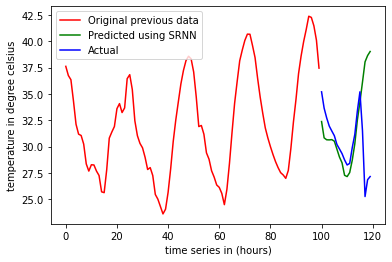

In [32]:
# visualize the prdiction with best RNN model
data_Start_Point = 15;
test_Data = input_data[data_Start_Point:data_Start_Point+100,:];
Temperature_input = output_data[data_Start_Point:data_Start_Point+100]
A = np.array(test_Data)
Min = Temperature_input.min(0);
Max = Temperature_input.max(0)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = output_data[data_Start_Point+100:data_Start_Point+120];
results = model10.predict(((test_Data.reshape(100,6)-Mi)/Mx).reshape(1,100,6))
print(len(results))
results = results*Max+Min;
#time = dfs['Datetime'][65]
#plt.title('Temperature vs time')
plt.plot(range(0,100),Temperature_input, 'r')
plt.plot(range(100,120),results.reshape(20),'g')
plt.plot(range(100,120),actual_Target, 'b')
plt.xlabel("time series in (hours)")
plt.ylabel("temperature in degree celsius")
plt.legend(('Original previous data','Predicted using SRNN','Actual'))

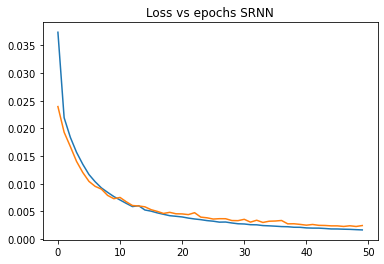

In [ ]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Loss vs epochs SRNN')

plt.show()

In [ ]:
def model_builder2(hp):
  model = keras.Sequential()
  #model.add(keras.layers(input_shape = ( 50,2)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  for i in range(hp.Int('num_layers', 2, 3)): 
      model.add(keras.layers.LSTM(units=hp.Int('units_' + str(i),min_value=16,max_value=448,step=32), 
                                       activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid','softmax'], 
                                                            default='relu'), batch_input_shape = (None, 50,6),return_sequences = True))
  model.add(LSTM((16), return_sequences = False))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mse',metrics=['mean_absolute_error'])

  return model

In [ ]:
tuner2 = kt.Hyperband(model_builder2,
                     objective='mean_absolute_error',
                     max_epochs=10,
                     factor=4,
                     directory='VIR',
                     project_name='intro_du_kt')

In [ ]:
tuner2.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 11 Complete [00h 06m 26s]
mean_absolute_error: 0.07306763529777527

Best mean_absolute_error So Far: 0.06824907660484314
Total elapsed time: 01h 29m 56s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary(1)  # print out the summary of the best model

Results summary
Results in VIR/intro_du_kt
Showing 1 best trials
Objective(name='mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 176
dense_activation: relu
units_1: 368
learning_rate: 0.0001
units_2: 432
tuner/epochs: 10
tuner/initial_epoch: 3
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: d06b0f39905ef41b9be030f9949e9f44
Score: 0.06824907660484314


In [ ]:
best_hps1=tuner2.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model11 = tuner2.hypermodel.build(best_hps1)
model11.summary()
history11 = model11.fit(x_train, y_train, epochs=50, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 176)           128832    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 368)           802240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 432)           1384128   
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 16)                28736     
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 2,344,106
Trainable params: 2,344,106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
190/190 [==============================] - 174s 894ms/step - loss: 0.0319 - mean_absolute_error: 0.13

1


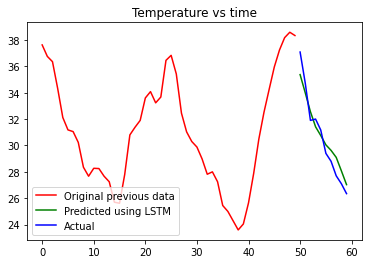

In [ ]:
# visualize the prdiction with best RNN model
data_Start_Point = 15;
test_Data = input_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = output_data[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Min = Temperature_input.min(0);
Max = Temperature_input.max(0)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = output_data[data_Start_Point+50:data_Start_Point+60];
results = model11.predict(((test_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
print(len(results))
results = results*Max+Min;
#time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using LSTM','Actual'))

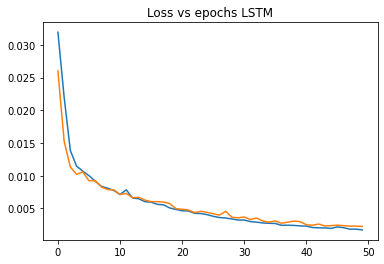

In [ ]:
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('Loss vs epochs LSTM')
plt.show()

In [ ]:
def model_builder3(hp):
  model = keras.Sequential()
  #model.add(keras.layers(input_shape = ( 50,2)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  for i in range(hp.Int('num_layers', 2, 3)): 
      model.add(keras.layers.GRU(units=hp.Int('units_' + str(i),min_value=16,max_value=448,step=32), 
                                       activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid','softmax'], 
                                                            default='relu'), batch_input_shape = (None, 50,6),return_sequences = True))
  model.add(GRU((16), return_sequences = False))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mse',metrics=['mean_absolute_error'])

  return model

In [ ]:
tuner3 = kt.Hyperband(model_builder3,
                     objective='mean_absolute_error',
                     max_epochs=10,
                     factor=4,
                     directory='VIR',
                     project_name='k2t')

In [ ]:
tuner3.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 11 Complete [00h 06m 26s]
mean_absolute_error: 0.07780002057552338

Best mean_absolute_error So Far: 0.07277155667543411
Total elapsed time: 00h 58m 19s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary(1)  # print out the summary of the best model

Results summary
Results in VIR/k2t
Showing 1 best trials
Objective(name='mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 48
dense_activation: softmax
units_1: 432
learning_rate: 0.01
units_2: 336
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.07277155667543411


In [ ]:
best_hps2=tuner3.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model12 = tuner3.hypermodel.build(best_hps2)
model12.summary()
history12 = model12.fit(x_train, y_train, epochs=50, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50, 48)            8064      
_________________________________________________________________
gru_1 (GRU)                  (None, 50, 432)           624672    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 16)                21600     
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 654,506
Trainable params: 654,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
190/190 [==============================] - 58s 285ms/step - loss: 0.0291 - mean_absolute_error: 0.1335 - val_loss: 0.0286 - val_mean_absolute_error: 0.1311
Epoch 2/50
190/190 [==============================] - 54s 282ms/step - loss: 0.02

1


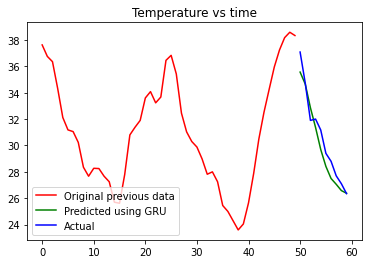

In [ ]:
# visualize the prdiction with best RNN model
data_Start_Point = 15;
test_Data = input_data[data_Start_Point:data_Start_Point+50,:];
Temperature_input = output_data[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Min = Temperature_input.min(0);
Max = Temperature_input.max(0)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = output_data[data_Start_Point+50:data_Start_Point+60];
results = model12.predict(((test_Data.reshape(50,6)-Mi)/Mx).reshape(1,50,6))
print(len(results))
results = results*Max+Min;
#time = dfs['Datetime'][65]
plt.title('Temperature vs time')
plt.plot(range(0,50),Temperature_input, 'r')
plt.plot(range(50,60),results.reshape(10),'g')
plt.plot(range(50,60),actual_Target, 'b')
plt.legend(('Original previous data','Predicted using GRU','Actual'))

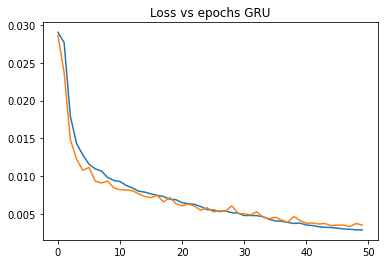

In [ ]:
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('Loss vs epochs GRU')
plt.show()